In [78]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error


In [79]:
data = pd.read_csv("house_price.csv")

print("Number of nulls: \n",data.isnull().sum())

Number of nulls: 
 size       0
bedroom    0
price      0
dtype: int64


,size,bedroom,price
size,1.000000,0.559967,0.854988
bedroom,0.559967,1.000000,0.442261
price,0.854988,0.442261,1.000000


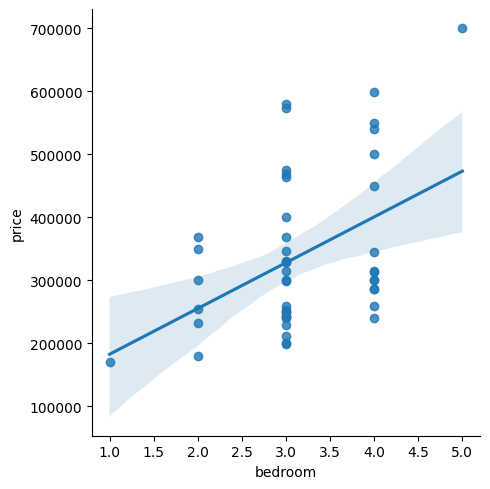

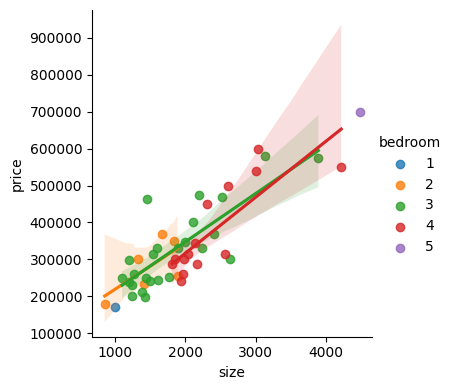

In [80]:
sns.lmplot(x='bedroom',y='price',data=data)
sns.lmplot(x='size',y='price',data=data, hue='bedroom',height=4)
data.corr()

In [81]:


x = data[['bedroom','size']]


y = data[['price']]


x_train , x_test, y_train, y_test = train_test_split(x,y,test_size=.3,random_state=42)

reg = LinearRegression().fit(x_train,y_train)



y_predict = reg.predict(x_test)



mae = mean_absolute_error(y_true=y_test,y_pred=y_predict)
mse = mean_squared_error(y_true=y_test,y_pred=y_predict)
mape = mean_absolute_percentage_error(y_true=y_test,y_pred=y_predict)

print("MAE: $", round(mae,2),)
print("MSE: $", round(mse,2))
print("RMSE: $", round(np.sqrt(mse),2))
print("MAPE:", round(mape * 100,2), "%") 
print("Coefficients:", sgd.coef_)



MAE: $ 68295.66
MSE: $ 7611089615.01
RMSE: $ 87241.56
MAPE: 17.08 %
Coefficients: [ -1556.65892135 102402.7040326 ]


The trade-offs of these metrics are that the MAE show all the errors same scale while MSE and RMSE both show the huge errors more significant to highlight the biggest error of prediction. 

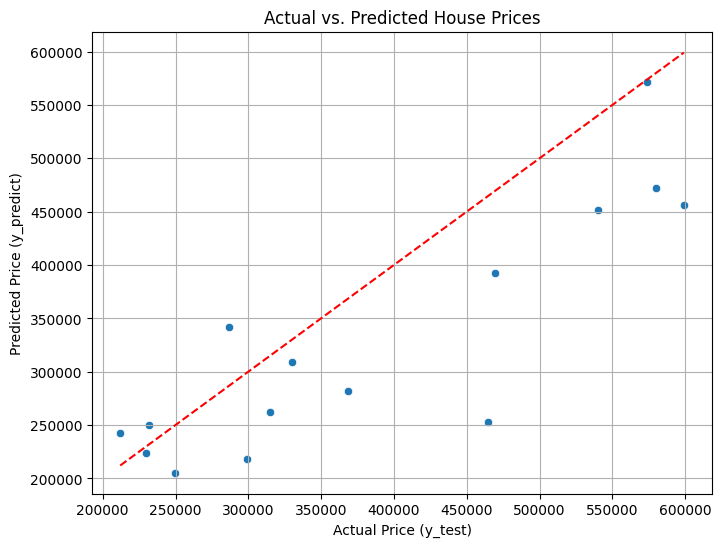

In [82]:
plt.figure(figsize=(8, 6))

sns.scatterplot(x=y_test.values.ravel(), y=y_predict.ravel())

# Add a perfect prediction reference line: y = x
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

# Labels and title
plt.xlabel('Actual Price (y_test)')
plt.ylabel('Predicted Price (y_predict)')
plt.title('Actual vs. Predicted House Prices')
plt.grid(True)
plt.show()

In [83]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=.3,random_state=42)

sgd = SGDRegressor(max_iter=1000,tol=1e-3)
sgd.fit(x_train,y_train.values.ravel())

y_predict = sgd.predict(x_test)


mae = mean_absolute_error(y_true=y_test,y_pred=y_predict)
mse = mean_squared_error(y_true=y_test,y_pred=y_predict)
mape = mean_absolute_percentage_error(y_true=y_test,y_pred=y_predict)

print("MAE: $", round(mae,2),)
print("MSE: $", round(mse,2))
print("RMSE: $", round(np.sqrt(mse),2))
print("MAPE:", round(mape * 100,2), "%") 
print("Coefficients:", sgd.coef_)


MAE: $ 68592.85
MSE: $ 7649059972.66
RMSE: $ 87458.9
MAPE: 17.11 %
Coefficients: [ -1466.48348178 102237.91328181]


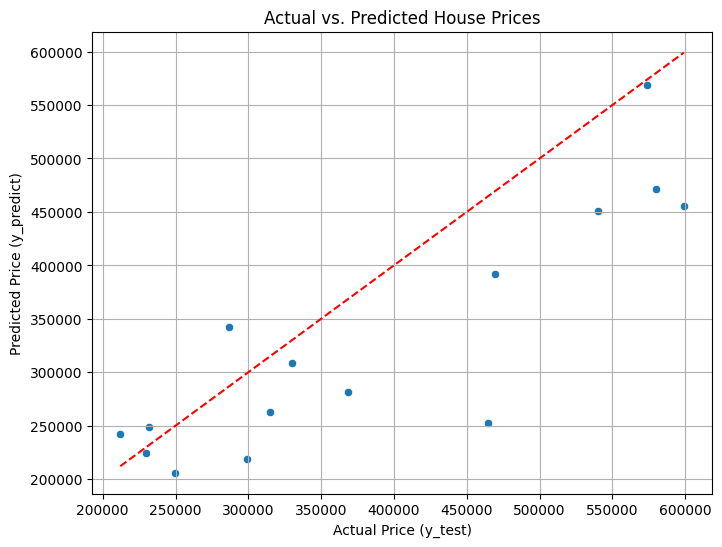

In [84]:
plt.figure(figsize=(8, 6))

sns.scatterplot(x=y_test.values.ravel(), y=y_predict.ravel())

# Add a perfect prediction reference line: y = x
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

# Labels and title
plt.xlabel('Actual Price (y_test)')
plt.ylabel('Predicted Price (y_predict)')
plt.title('Actual vs. Predicted House Prices')
plt.grid(True)
plt.show()